# CNN on Image Data - CIFAR10

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

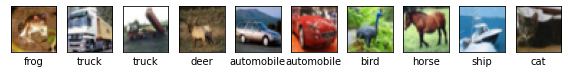

In [6]:
plt.figure(figsize=(32,32))
for i in range(10):
    plt.subplot(32,32,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

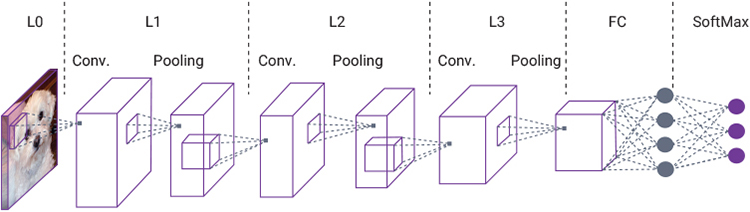

# Create the Layers in CNN

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_8/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_8/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,32].

In [21]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.3712 - accuracy: 0.5019 - val_loss: 1.1210 - val_accuracy: 0.6025
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9755 - accuracy: 0.6563 - val_loss: 0.9550 - val_accuracy: 0.6656
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7581 - accuracy: 0.7346 - val_loss: 0.8789 - val_accuracy: 0.7023
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5727 - accuracy: 0.7997 - val_loss: 0.9320 - val_accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4056 - accuracy: 0.8567 - val_loss: 1.0094 - val_accuracy: 0.7053
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2753 - accuracy: 0.9025 - val_loss: 1.1704 - val_accuracy: 0.6901
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1935 - accuracy: 0.9322 - val_loss: 1.3201 - val_accur

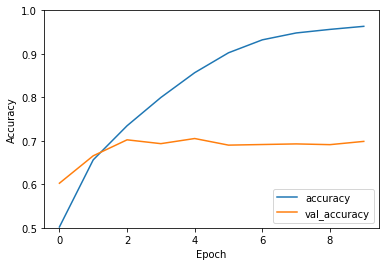

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.5642 - accuracy: 0.6987


In [18]:
print(test_acc)

0.6987000107765198


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

4


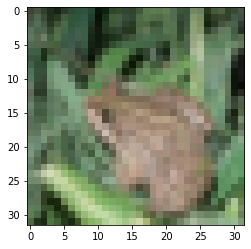

In [19]:
image_index = 4
plt.imshow(test_images[image_index].reshape(32, 32, 3),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())

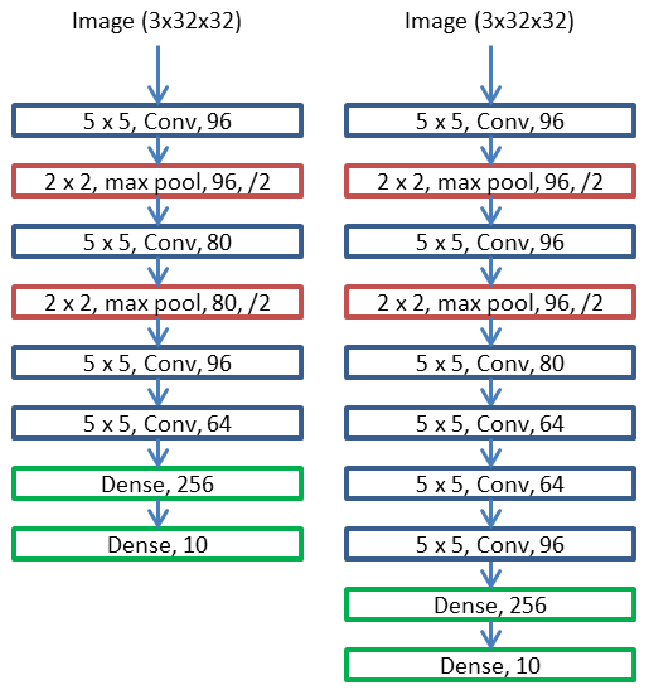